# Evolution de population dans deux armées en bataille


## Documentation et Imports


Crée le 13 mai 2021

Auteur: Valentin Laplaud

Le but de ce notebook est de résoudre différente versions des équations de prédation de Lanchester, appliquée a l'évolution de la population de deux armées lors d'une bataille.

In [1]:
import numpy as np 
import scipy.integrate as scpint
import matplotlib.pyplot as plt

### Fonctions utiles

In [2]:
""" Test de positivité strict"""
def strctpos(x):
    
    if x > 0:
        p = 1
    else:
        p = 0 
    
    return(p)     


## Résolution des équations

### Lanchester

#### Définition et résolution

In [3]:
def Solve_Lc(t,X0,P):
    
    """ Equations d'évolution """
    a,b = P
    def dX_dt_Lc(X, t=0):

        du_dt =  -b*max([X[1],0])*strctpos(X[0]) # du/dt = -a*v(t) et u(t) > 0
        dv_dt =  -a*max([X[0],0])*strctpos(X[1]) # dv/dt = -b*u(t) et v(t) > 0

        return np.array([ du_dt , dv_dt ])
    
    """ Intégration """
    X_Lc, infodict = scpint.odeint(dX_dt_Lc, X0, t, full_output=True)  
    
    return(X_Lc)

#### Graphe des solution

In [4]:
def PlotRes_Lc(t,X,P,Ttl,labels, **kwargs):
    
    exp = 0
    for item,value in kwargs.items(): 
        if item == 'texp':
            Texp = value
        elif item == 'popexp':
            POPexp = value
            exp = 1
    
    u, v = X.T # Récupération des trajectoires

    print('Paramètres : \nArmée 1 : ' + str(X[0][0]) + ' soldat, ' + str(P[0]) + ' puissance. ' + 
          '\nArmée 2 : ' + str(X[0][1]) + ' soldat, ' + str(P[1]) + ' puissance.') 

    """ Graphe d'évolution en temps """
    f1, ax1 = plt.subplots(dpi=250,facecolor='w')
    plt.title(Ttl)
    ax1.plot(t, u, 'r-', lw = 1, label=labels[0])
    ax1.plot(t, v  , 'b-', lw = 1, label=labels[1])
    if exp:
        ax1.plot(Texp,POPexp,'--k',lw=0.5)
    plt.grid()
    #plt.legend(loc='best')
    plt.xlabel('Temps')
    plt.ylabel('Population')
    plt.ylim(50000,70000)
    plt.xticks(ticks=[0,4,8,12,16,20,24,28,32,36])
   

    return

### Lanchester avec reserve

#### Définition et résolution

In [5]:
def Res(t): # Fonction envoie de renfort depuis la resserve
    
    if (t>=0) & (t<1):
        R = 0
    elif (t>=1) & (t<2):
        R = 0
    elif (t>=2) & (t<3):
        R = 6000
    elif (t>=3) & (t<5):
        R = 0
    elif (t>=5) & (t<6):
        R = 13000
    else:
        R = 0
        
    return(R)

def Solve_LcR(tspan,teval,X0,P):
    
    """ Equations d'évolution """
    a,b = P
    def dX_dt_LcR(t, X):

        du_dt =  Res(t)-b*max([X[1],0])*strctpos(X[0]) # du/dt = -a*v(t) et u(t) > 0
        dv_dt =  -a*max([X[0],0])*strctpos(X[1]) # dv/dt = -b*u(t) et v(t) > 0

        return np.array([ du_dt , dv_dt ])
   # T_LcR,X_LcR = scpint.solve_ivp(dX_dt_LcR, (0,36), X0, method='RK45', t_eval=np.linspace(0, 36,  37))
    """ Intégration """
    Sol = scpint.solve_ivp(dX_dt_LcR,tspan, X0,method='RK45',max_step=0.1,t_eval = teval)  
    
    T_LcR = Sol.t
    X_LcR = Sol.y
    
    return(T_LcR, X_LcR)

## Résultats

### Lanchester

Lanchester :

Paramètres : 
Armée 1 : 100.0 soldat, 0.1 puissance. 
Armée 2 : 105.0 soldat, 0.1 puissance.


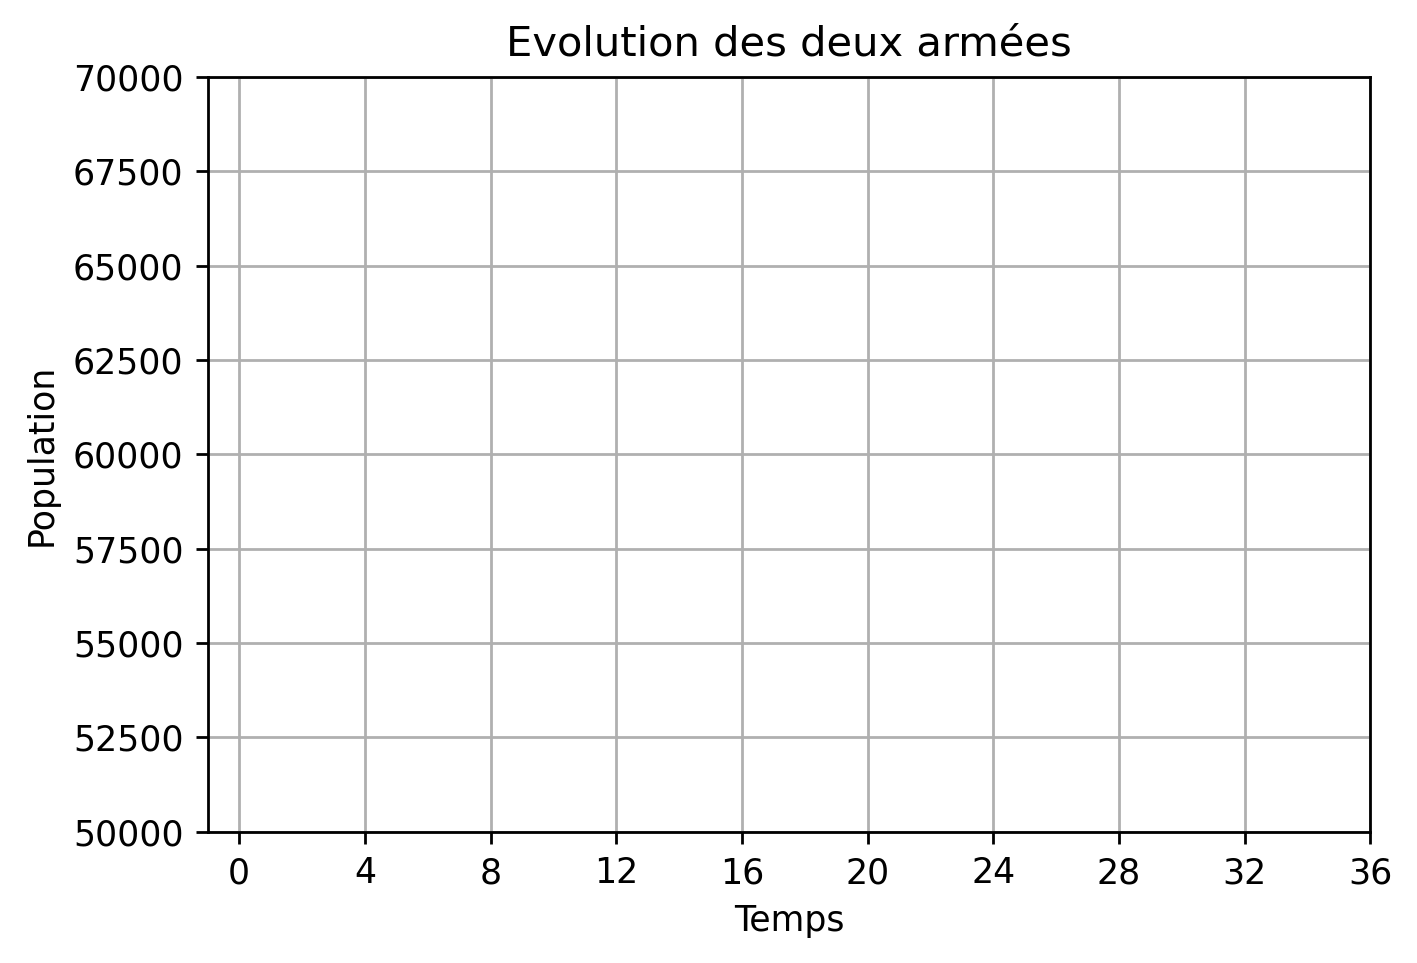

In [6]:
t = np.linspace(0, 20,  1000) # Temps

""" Lanchester """
P_Lc = [0.1,0.1] # Set de paramètres 
X0_Lc = np.array([100, 105])  # Conditions initiales

print('\033[1m' + '\033[4m' + 'Lanchester :\n' + '\033[0m')

PlotRes_Lc(t,Solve_Lc(t,X0_Lc,P_Lc),P_Lc,'Evolution des deux armées',['Armée 1','Armée 2'])

### Lanchester avec réserve Iwo Jima

Lanchester :

Paramètres : 
Armée 1 : 54000.0 soldat, 0.0106 puissance. 
Armée 2 : 22000.0 soldat, 0.0544 puissance.


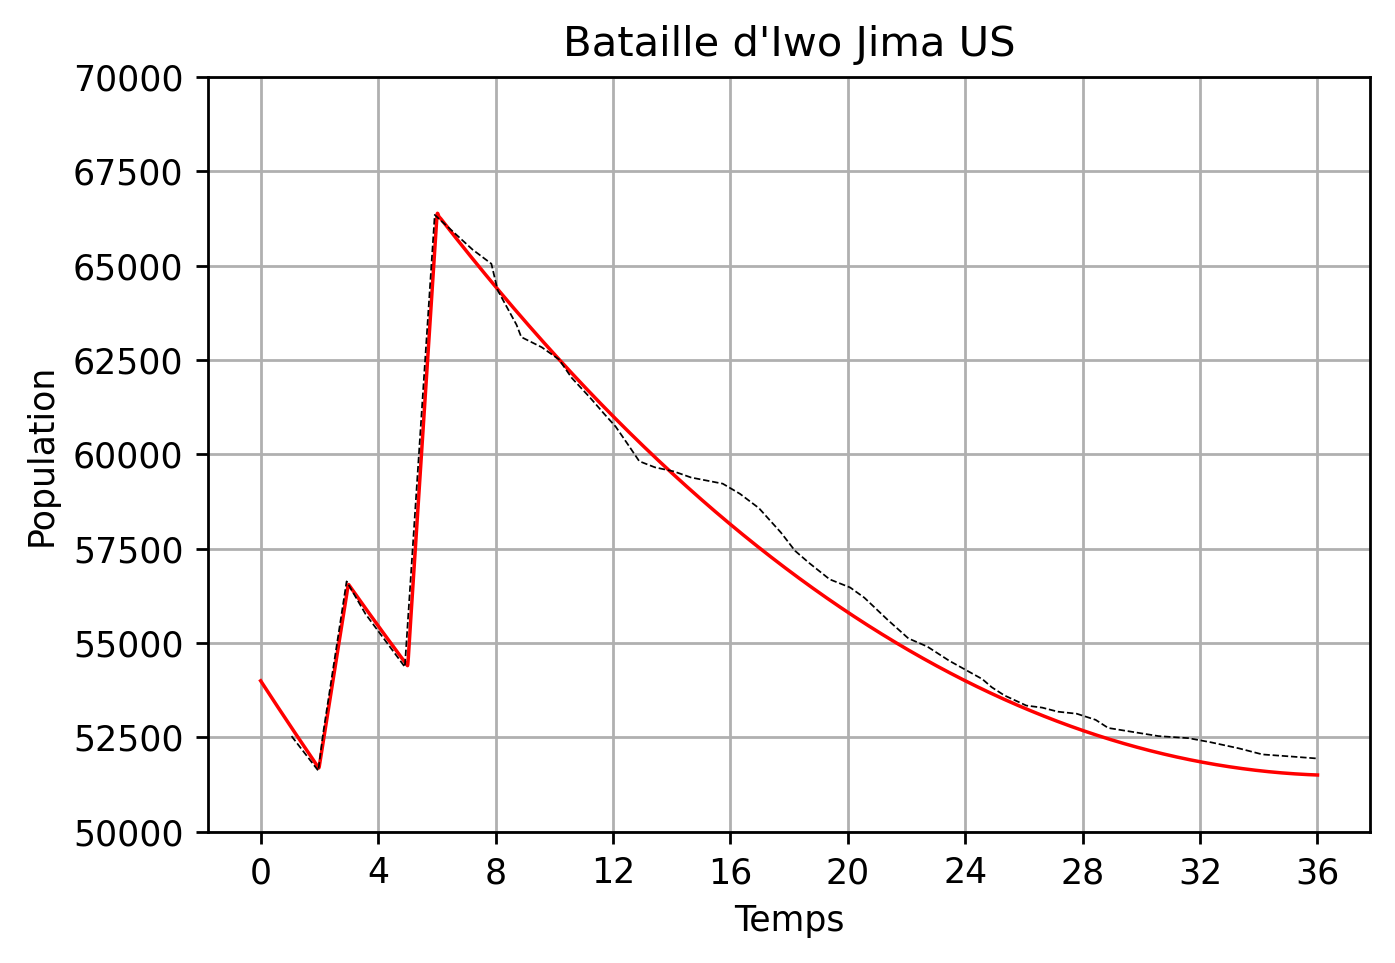

In [7]:
njour = 36

tspan = (0,njour)
teval = np.linspace(0, njour,  (njour+1)*100) # Temps

# Donnée expérimentale
Texp = [1.05192629815745, 1.96314907872696, 2.12395309882747,2.92797319932998, 3.57118927973199, 4.91122278056951, 
        5.92964824120603, 7.21608040201005, 7.85929648241206, 8.07370184254606, 8.71691792294807, 8.87772194304857, 
        9.57453936348408, 10.1641541038525, 10.5929648241206, 10.9145728643216, 11.2361809045226, 11.7185929648241, 
        12.0938023450586, 12.5226130653266, 12.8978224455611, 13.4338358458961, 14.0770519262981, 14.6666666666666, 
        15.7386934673366, 16.3283082077051, 16.9715242881072, 17.7219430485762, 18.2043551088777, 18.6867671691792, 
        19.3835845896147, 20.0804020100502, 20.5628140703517, 21.3668341708542, 22.0636515912897, 22.7068676716917, 
        23.4572864321608, 24.2077051926298, 24.5829145728643, 24.9045226130653, 25.3333333333333, 26.0837520938023, 
        26.6197654941373, 27.1557788944723, 27.7989949748743, 28.4422110552763, 28.8710217755443, 29.7286432160804, 
        30.5862646566164, 31.6046901172529, 32.3551088777219, 33.3199329983249, 34.1239530988274, 35.0887772194304, 36]

POPexp = [52534.8314606741, 51617.9775280898, 52588.7640449438, 56633.7078651685, 55770.7865168539, 54368.5393258427, 
          66341.5730337078, 65424.7191011236, 65047.1910112359, 64346.0674157303, 63429.213483146, 63105.617977528, 
          62835.9550561797, 62512.3595505618, 62026.9662921348, 61757.3033707865, 61487.6404494382, 61056.1797752809, 
          60732.5842696629, 60247.1910112359, 59815.7303370786, 59653.9325842696, 59546.0674157303, 59384.2696629213, 
          59222.4719101123, 58952.808988764, 58575.2808988764, 57928.0898876404, 57442.6966292134, 57119.1011235955, 
          56687.6404494382, 56471.9101123595, 56202.2471910112, 55608.9887640449, 55123.5955056179, 54907.8651685393, 
          54530.3370786516, 54206.7415730337, 54044.9438202247, 53829.213483146, 53613.4831460674, 53343.8202247191,
          53289.8876404494, 53182.0224719101, 53128.0898876404, 52966.2921348314, 52750.5617977528, 52642.6966292134, 
          52534.8314606741, 52480.8988764044, 52373.0337078651, 52211.2359550561, 52049.4382022471, 51995.5056179775, 
          51941.5730337078]

""" Lanchester """  
P_LcR = [0.0106,0.0544] # Set de paramètres 
X0_LcR = np.array([54000, 22000])  # Conditions initiales

print('\033[1m' + '\033[4m' + 'Lanchester :\n' + '\033[0m')
T_LcR,X_LcR = Solve_LcR(tspan,teval,X0_LcR,P_LcR)

PlotRes_Lc(T_LcR,X_LcR.T,P_LcR,'Bataille d\'Iwo Jima US',['US','Japon'],texp = Texp, popexp = POPexp)


## Tests